---
title: "ODE Error"
subtitle: "BMES 678: Programming Assignment"
author: "Tony Kabilan Okeke"
format: PrettyPDF-pdf
---

## Setup

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

from typing import Callable
import warnings

warnings.filterwarnings("ignore")


def create_fig(
    figsize: tuple,
    title: str,
    xlab: str,
    ylab: str,
    xgrid: bool = True,
    ygrid: bool = True,
) -> tuple:
    """Create an empty figure with nice formatting."""
    fig, ax = plt.subplots(figsize=figsize)
    ax.minorticks_on()
    ax.spines[["top", "right"]].set_visible(False)
    if xgrid:
        ax.xaxis.grid(True, which="major", color="gray", linewidth=0.5)
        ax.xaxis.grid(True, which="minor", color="gray", linewidth=0.2, linestyle="--")
    if ygrid:
        ax.yaxis.grid(True, which="major", color="gray", linewidth=0.5)
        ax.yaxis.grid(True, which="minor", color="gray", linewidth=0.2, linestyle="--")
    ax.set_xlabel(xlab, fontsize=11)
    ax.set_ylabel(ylab, fontsize=11)
    ax.set_title(title, fontsize=12)
    return fig, ax


def eulermethod(
    fprime: Callable,
    timespan: tuple[float, float],
    y0: list[float],
    h: float = 0.1,
) -> tuple[np.ndarray, np.ndarray]:
    """First-Order Euler's method for solving ODEs
    Modified from `hwodeintro` submission.
    """

    x0, xend = timespan
    X = np.array([x0 + i * h for i in range(int(np.ceil((xend - x0) / h)))])
    Y = np.empty((len(X), len(y0)))
    Y[0, :] = y0

    for i in range(1, X.shape[0]):
        Y[i, :] = Y[i - 1, :] + h * fprime(X[i - 1], Y[i - 1, :])

    return X, Y

## Improved Euler's Method

Write a function `[X,Y] = eulermethod_improved(fprime, timespan, y0, h=0.1)` that implements the improved Euler's method discussed in class.

In [2]:
def eulermethod_improved(
    fprime: Callable,
    timespan: tuple[float, float],
    y0: list[float],
    h: float = 0.1,
) -> tuple:
    """Second-Order Euler's (Heun's) method for solving ODEs"""

    x0, xend = timespan
    X = np.array([x0 + i * h for i in range(int(np.ceil((xend - x0) / h)))])
    Y = np.empty((len(X), len(y0)))
    Y[0, :] = y0

    for i in range(1, X.shape[0]):
        y_pred = Y[i - 1, :] + h * fprime(X[i - 1], Y[i - 1, :])
        Y[i, :] = Y[i - 1, :] + (h / 2) * (
            fprime(X[i - 1], Y[i - 1, :]) + fprime(X[i], y_pred)
        )

    return X, Y

## Runge-Kutta Method

Write a function `[X,Y] = eulermethod_rungekutta(fprime, timespan, y0, h=0.1)` that implements the Runge Kutta method discussed in class.

In [3]:
def eulermethod_rungekutta(
    fprime: Callable,
    timespan: tuple[float, float],
    y0: list[float],
    h: float = 0.1,
) -> tuple:
    """Fourth-Order Runge-Kutta method for solving ODEs"""

    x0, xend = timespan
    X = np.array([x0 + i * h for i in range(int(np.ceil((xend - x0) / h)))])
    Y = np.empty((len(X), len(y0)))
    Y[0, :] = y0

    for i in range(1, X.shape[0]):
        K1 = h * fprime(X[i - 1], Y[i - 1, :])
        K2 = h * fprime(X[i - 1] + h / 2, Y[i - 1, :] + K1 / 2)
        K3 = h * fprime(X[i - 1] + h / 2, Y[i - 1, :] + K2 / 2)
        K4 = h * fprime(X[i - 1] + h, Y[i - 1, :] + K3)
        Y[i, :] = Y[i - 1, :] + (K1 + 2 * K2 + 2 * K3 + K4) / 6

    return X, Y

## $sin(x)$

Consider the problem of approximating sin(x) for `x=0..5`.

Use Euler's Method, Improved Euler's Method, and Runga-Kutta method to approximate the value of sin(x), with a step size of `h=0.5`. Also use ode45() method (with default parameters; do not change the step size).

Plot the correct values and the approximations of the sin(x) using each of these methods on the same figure. Report the average error in approximation for these methods as a bar plot. It is your responsibility to have this plot demonstrate the differences in errors. If differences are not clear from just looking at the plot, you may need to transform your data or supplement your plot with labels.



(0.0, 5.0)

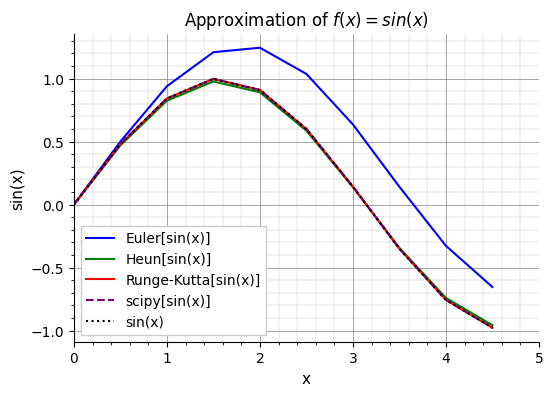

In [4]:
# | fig-align: center
# | fig-cap: Approximation of $f(x) = sin(x)$

# parameters
x = (0, 5)
h = 0.5
f0 = [0]


# functions
def fprime(x: float, y: float) -> float:
    return np.cos(x)


# solve with custom solvers
_, y_E1 = eulermethod(fprime, x, f0, h)
_, y_E2 = eulermethod_improved(fprime, x, f0, h)
X, y_RK4 = eulermethod_rungekutta(fprime, x, f0, h)
y_ode45 = solve_ivp(fprime, x, f0, t_eval=X).y.T

# actual function
y = np.sin(X).reshape(-1, 1)

# plot results
fig, ax = create_fig((6, 4), "Approximation of $f(x) = sin(x)$", "x", "sin(x)")
ax.plot(X, y_E1, label="Euler[sin(x)]", color="blue")
ax.plot(X, y_E2, label="Heun[sin(x)]", color="green")
ax.plot(X, y_RK4, label="Runge-Kutta[sin(x)]", color="red")
ax.plot(X, y_ode45, label="scipy[sin(x)]", color="purple", linestyle="--")
ax.plot(X, y, label="sin(x)", color="black", linestyle=":")
ax.legend(fancybox=False, framealpha=1)
ax.set_xlim(*x)

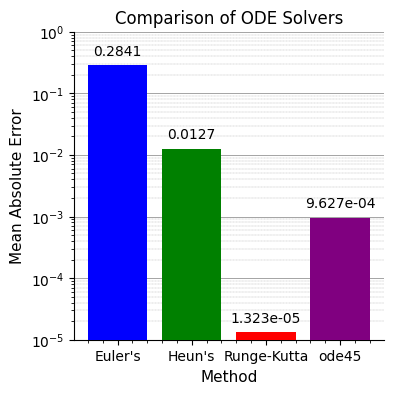

In [5]:
# | fig-align: center
# | fig-cap: Approximation Error of $f(x) = sin(x)$ (MAE shown in log scale)

# compute error
mae = np.mean(np.abs(np.hstack([y_E1, y_E2, y_RK4, y_ode45]) - y), axis=0)
lab = ["Euler's", "Heun's", "Runge-Kutta", "ode45"]

# plot results
fig, ax = create_fig(
    (4, 4),
    "Comparison of ODE Solvers",
    "Method",
    "Mean Absolute Error",
    xgrid=False,
)
bars = ax.bar(lab, mae, color=["blue", "green", "red", "purple"], zorder=3)
ax.set_yscale("log")
ax.set_ylim(1e-5, 1)
for bar, error in zip(bars, mae):
    err = f"{error:.4f}" if error > 1e-3 else f"{error:.3e}"
    ax.annotate(
        err,
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center",
        va="bottom",
        textcoords="offset points",
        xytext=(0, 5),
    )

## Lotka-Volterra Predator-Prey Model

Consider the following Lotka-Volterra predator (y) prey (x) model:

- x'(t) = Ax(t) - Bx(t)y(t)
- y'(t) = Cx(t)y(t) - Dy(t)
- Let A=D=2, B=C=1.8
 
Approximate the population dynamics of the predator and prey, using Euler's method, for `t=0..10` starting with `x(0)=4`, `y(0)=4`, and step size `h=0.1`. Show the population dynamics of the two species on the same plot.

Repeat the approximation and plotting using Improved Euler's method and Runga-Kutta method.

Draw the phase diagram (that means with the quiver arrows). Show the integral curves you generated with each of these methods on the same phase-plot diagram.

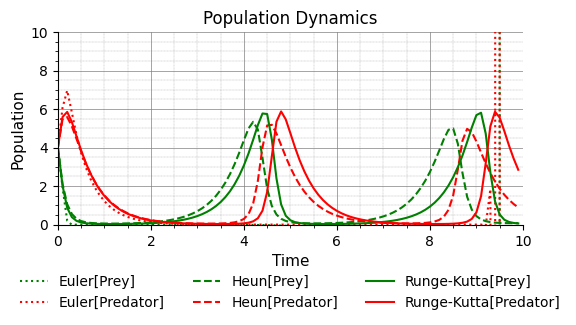

In [6]:
# | fig-align: center
# | fig-cap: Population Dynamics for Prey-Predator Model

# parameters
A = D = 2
B = C = 1.8
Y0 = [4, 4]
t = (0, 10)
h = 0.1

# derivatives
def fprime(t, Y):
    x, y = Y
    return np.array([A * x - B * x * y, C * x * y - D * y])

# solutions
X, y_e1 = eulermethod(fprime, t, Y0, h)
_, y_e2 = eulermethod_improved(fprime, t, Y0, h)
_, y_rk4 = eulermethod_rungekutta(fprime, t, Y0, h)
y_ode45 = solve_ivp(fprime, t, Y0, t_eval=X).y.T

# plot population dynamics
fig, ax = create_fig((6, 2.5), "Population Dynamics", "Time", "Population")
for y, m, ls in zip(
    [y_e1, y_e2, y_rk4], ["Euler", "Heun", "Runge-Kutta"], [":", "--", "-"]
):
    for i in range(2):
        lab, c = ("Prey", "green") if i == 0 else ("Predator", "red")
        ax.plot(X, y[:, i], label=f"{m}[{lab}]", color=c, linestyle=ls)
ax.set_xlim(*t)
ax.set_ylim(0, 10)
ax.legend(frameon=False, loc="center", bbox_to_anchor=(0.5, -0.35), ncol=3)

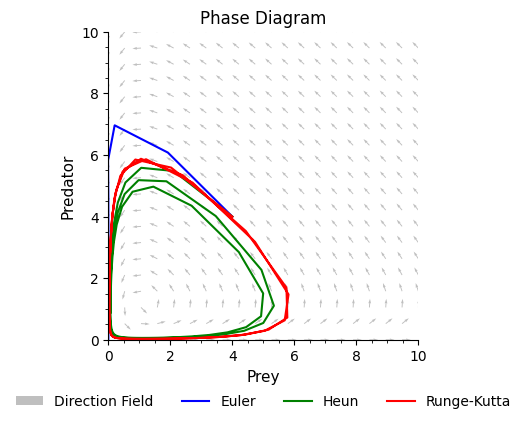

In [7]:
# | fig-align: center
# | fig-cap: Population Dynamics for Prey-Predator Model

# plot phase diagram
xmesh, ymesh = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))
dx = A * xmesh - B * xmesh * ymesh
dy = C * xmesh * ymesh - D * ymesh
norm = np.sqrt(dx**2 + dy**2)
dx /= norm
dy /= norm

fig, ax = create_fig(
    (4, 4), "Phase Diagram", "Prey", "Predator", xgrid=False, ygrid=False
)
ax.quiver(xmesh, ymesh, dx, dy, color="gray", alpha=0.5, label="Direction Field")
for y, m, c in zip(
    [y_e1, y_e2, y_rk4], ["Euler", "Heun", "Runge-Kutta"], ["blue", "green", "red"]
):
    ax.plot(y[:, 0], y[:, 1], label=m, color=c)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend(frameon=False, loc="center", bbox_to_anchor=(0.5, -0.2), ncol=4)